In [32]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [17]:
# upload twitter credential as csv file for reading
from google.colab import files
files.upload()

Saving twitter_credentials.csv to twitter_credentials (2).csv


{'twitter_credentials.csv': b'credentials\r\nmc9hx9Ki0U9KjjNqHdheNgq8N\r\nBtW6K5CtvV24sWBaD6x5vxBPDiuVOVbbitei3wVBuMtulLhWLp\r\n1189563121997926401-4hJoItpx1yyk5JjKDsfO0KH1F8eyIp\r\ndn3qDg1s5njoklwsKyeUoFe4oFlneboaYI5my510m7j3i'}

In [27]:
# store credentials as variables
login_credentials = pd.read_csv('twitter_credentials (2).csv')
consumer_key, consumer_secret_key, access_token, access_secret_token = login_credentials["credentials"]

In [31]:
# create authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_secret_token)
# create tweepy api object
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True)

In [87]:
# search term
search_term = "#bitcoin -filter:retweets"
# number of items to query from twitter api 
NUM_ITEMS = 3000
# cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-12', tweet_mode='extended').items(NUM_ITEMS)
# all tweeets 
all_tweets = [tweet.full_text for tweet in tweets]


In [88]:
df = pd.DataFrame(all_tweets, columns=["Tweets"])
df.head(5)

,Tweets
0,I found #bitcoin in a Blue vault at this locat...
1,And it's #Bullish cycle... #Bitcoin #crypto ht...
2,@CryptoCapo_ Over 351%+ Profits within 2 hour ...
3,@Nathan_Combs_ Nice. #Giveaway 👍❤⚘\n\n#XRP #...
4,"Every day, plebs are buying more #Bitcoin than..."


In [89]:
def clean_data(tweet):
  tweet = re.sub("#bitcoin", "bitcoin", tweet)
  tweet = re.sub("#Bitcoin", "bitcoin", tweet)
  tweet = re.sub("\\n", '', tweet)
  tweet = re.sub("#[A-Za-z0-9]+", "", tweet)
  tweet = re.sub("https?:\/\/\S+", "", tweet)
  return tweet

df["Clean Tweets"] = df["Tweets"].apply(clean_data)
df.head(10)

,Tweets,Clean Tweets
0,I found #bitcoin in a Blue vault at this locat...,I found bitcoin in a Blue vault at this locati...
1,And it's #Bullish cycle... #Bitcoin #crypto ht...,And it's cycle... bitcoin
2,@CryptoCapo_ Over 351%+ Profits within 2 hour ...,@CryptoCapo_ Over 351%+ Profits within 2 hour ...
3,@Nathan_Combs_ Nice. #Giveaway 👍❤⚘\n\n#XRP #...,@Nathan_Combs_ Nice. 👍❤⚘ ...
4,"Every day, plebs are buying more #Bitcoin than...","Every day, plebs are buying more bitcoin than ..."
5,https://t.co/7iRj9ULQxj #BitcoinNews ► Sweet I...,bitcoinNews ► Sweet Integrates Polygon / Mati...
6,REMINDER: if you've HODL'd for at least 5 mont...,REMINDER: if you've HODL'd for at least 5 mont...
7,Up up up and away #Bitcoin #sntvt soon to be ...,Up up up and away bitcoin soon to be will f...
8,#birthdayweekend #linkedin #twitter #facebook ...,bitcoin Manage All Of Your So...
9,"@RaoulGMI @rektcapital Backtesting the ""Death ...","@RaoulGMI @rektcapital Backtesting the ""Death ..."


In [90]:
def get_subjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def get_polarity(tweet):
  return TextBlob(tweet).sentiment.polarity

df["Subjectivity"] = df["Clean Tweets"].apply(get_subjectivity)
df["Polarity"] = df["Clean Tweets"].apply(get_polarity)
df.head(10)

,Tweets,Clean Tweets,Subjectivity,Polarity
0,I found #bitcoin in a Blue vault at this locat...,I found bitcoin in a Blue vault at this locati...,0.550000,0.500000
1,And it's #Bullish cycle... #Bitcoin #crypto ht...,And it's cycle... bitcoin,0.000000,0.000000
2,@CryptoCapo_ Over 351%+ Profits within 2 hour ...,@CryptoCapo_ Over 351%+ Profits within 2 hour ...,0.800000,0.400000
3,@Nathan_Combs_ Nice. #Giveaway 👍❤⚘\n\n#XRP #...,@Nathan_Combs_ Nice. 👍❤⚘ ...,1.000000,0.600000
4,"Every day, plebs are buying more #Bitcoin than...","Every day, plebs are buying more bitcoin than ...",0.500000,0.500000
5,https://t.co/7iRj9ULQxj #BitcoinNews ► Sweet I...,bitcoinNews ► Sweet Integrates Polygon / Mati...,0.650000,0.350000
6,REMINDER: if you've HODL'd for at least 5 mont...,REMINDER: if you've HODL'd for at least 5 mont...,0.537500,0.050000
7,Up up up and away #Bitcoin #sntvt soon to be ...,Up up up and away bitcoin soon to be will f...,0.900000,0.800000
8,#birthdayweekend #linkedin #twitter #facebook ...,bitcoin Manage All Of Your So...,0.066667,0.033333
9,"@RaoulGMI @rektcapital Backtesting the ""Death ...","@RaoulGMI @rektcapital Backtesting the ""Death ...",0.355556,-0.029365


In [91]:
def get_sentiment(score):
  if score < 0:
    return "negative"
  elif score == 0: 
    return "neutral"
  elif score > 0: 
    return "positive"
  
df["Sentiment"] = df["Polarity"].apply(get_sentiment)
df.head(10)

,Tweets,Clean Tweets,Subjectivity,Polarity,Sentiment
0,I found #bitcoin in a Blue vault at this locat...,I found bitcoin in a Blue vault at this locati...,0.550000,0.500000,positive
1,And it's #Bullish cycle... #Bitcoin #crypto ht...,And it's cycle... bitcoin,0.000000,0.000000,neutral
2,@CryptoCapo_ Over 351%+ Profits within 2 hour ...,@CryptoCapo_ Over 351%+ Profits within 2 hour ...,0.800000,0.400000,positive
3,@Nathan_Combs_ Nice. #Giveaway 👍❤⚘\n\n#XRP #...,@Nathan_Combs_ Nice. 👍❤⚘ ...,1.000000,0.600000,positive
4,"Every day, plebs are buying more #Bitcoin than...","Every day, plebs are buying more bitcoin than ...",0.500000,0.500000,positive
5,https://t.co/7iRj9ULQxj #BitcoinNews ► Sweet I...,bitcoinNews ► Sweet Integrates Polygon / Mati...,0.650000,0.350000,positive
6,REMINDER: if you've HODL'd for at least 5 mont...,REMINDER: if you've HODL'd for at least 5 mont...,0.537500,0.050000,positive
7,Up up up and away #Bitcoin #sntvt soon to be ...,Up up up and away bitcoin soon to be will f...,0.900000,0.800000,positive
8,#birthdayweekend #linkedin #twitter #facebook ...,bitcoin Manage All Of Your So...,0.066667,0.033333,positive
9,"@RaoulGMI @rektcapital Backtesting the ""Death ...","@RaoulGMI @rektcapital Backtesting the ""Death ...",0.355556,-0.029365,negative


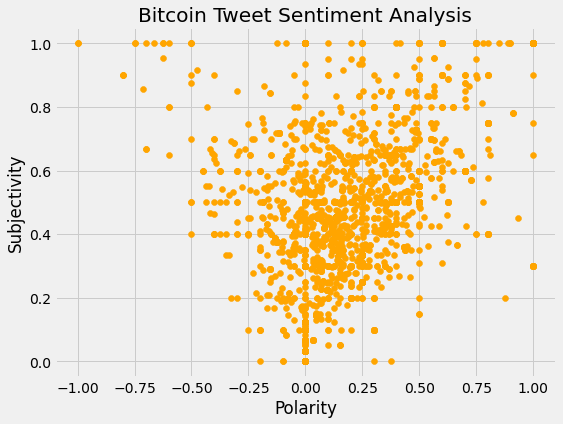

In [92]:
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Orange")
plt.title("Bitcoin Tweet Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

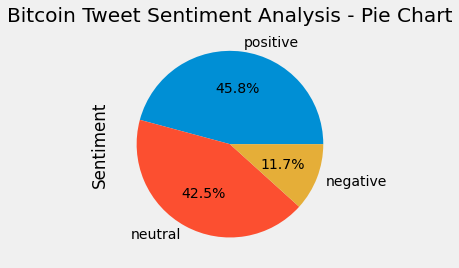

In [98]:
df["Sentiment"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Bitcoin Tweet Sentiment Analysis - Pie Chart")
plt.show()

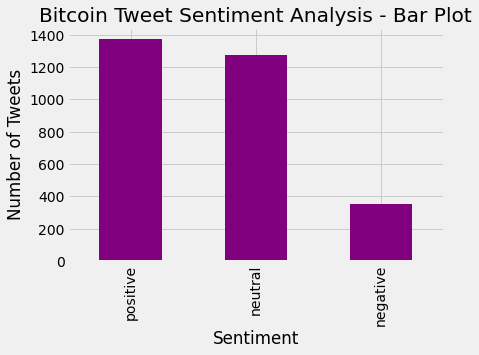

In [99]:
df["Sentiment"].value_counts().plot(kind="bar", color="Purple")
plt.title("Bitcoin Tweet Sentiment Analysis - Bar Plot")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()